In [2]:
import pandas as pd
%matplotlib inline

df = pd.read_csv('/monthly_milk_production.csv', encoding='utf8')
title = "Monthly milk production: pounds per cow. Jan '62 - Dec '75"

In [3]:
df.dtypes

Date          object
Production     int64
dtype: object

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date          datetime64[ns]
Production             int64
dtype: object

In [5]:
df = df.set_index('Date')

In [ ]:
df.head()

<Axes: xlabel='Date'>

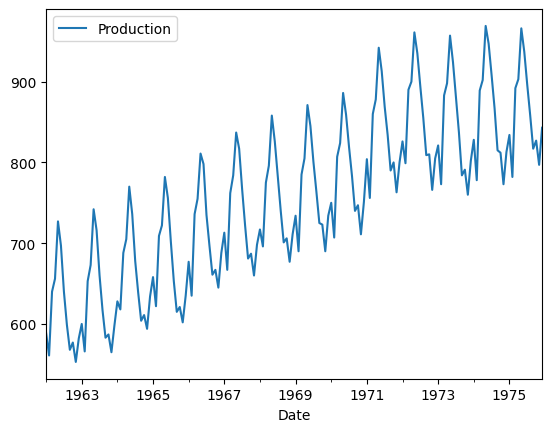

In [6]:
df.plot()

In [7]:
df['Month'] = df.index.month

In [8]:
df['Month'] = df.index.strftime('%B')

<Axes: title={'center': 'Production'}, xlabel='[Month]'>

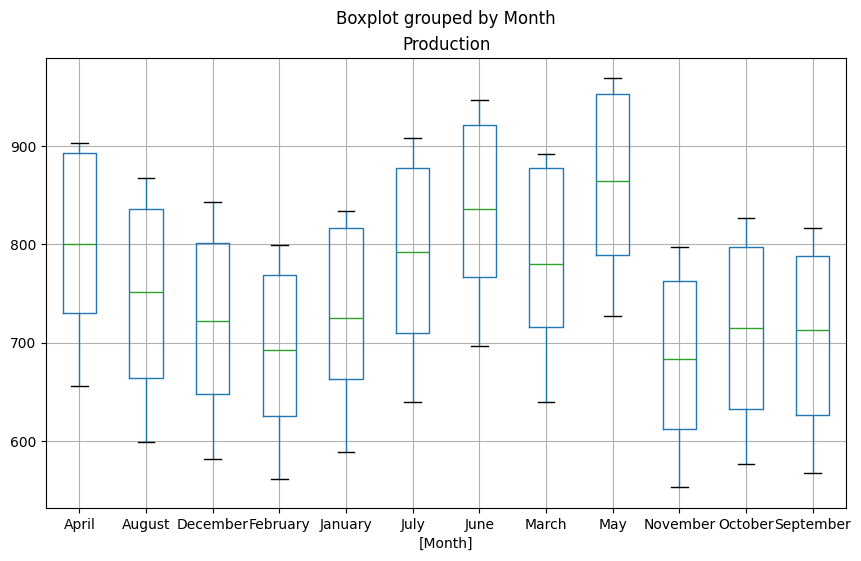

In [12]:
df[['Production', 'Month']].boxplot(by='Month', grid=True, figsize=(10,6))

In [16]:
starbucks = pd.read_csv('/starbucks.csv', index_col='Date', parse_dates=True)

In [17]:
starbucks.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

<Axes: xlabel='Date'>

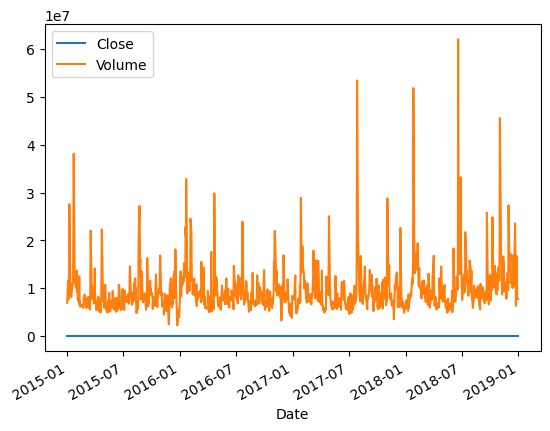

In [18]:
starbucks.plot()

This isn't very helpful due to the difference in y-values, so I am split them up.

[Text(0.5, 0, 'Closing Date'), Text(0, 0.5, 'Closing Price (USD)')]

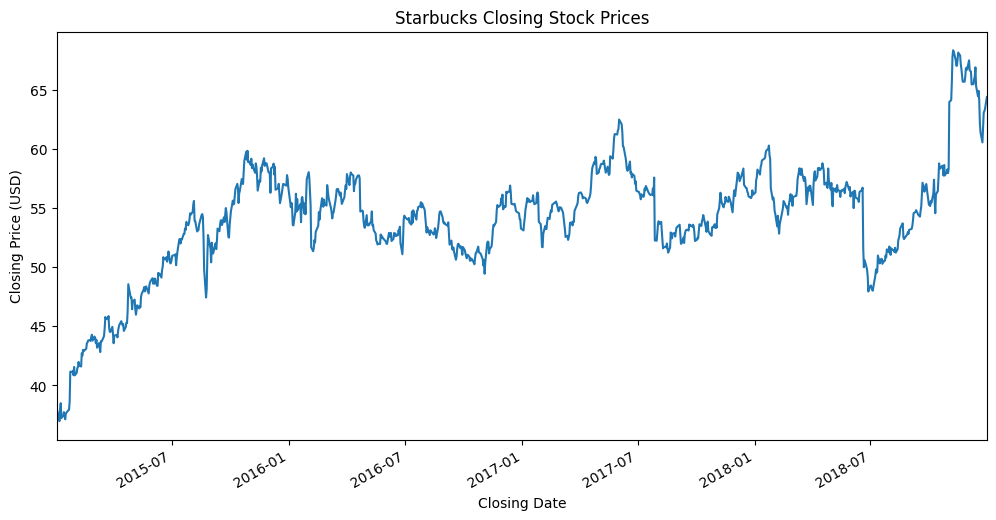

In [27]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = starbucks['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

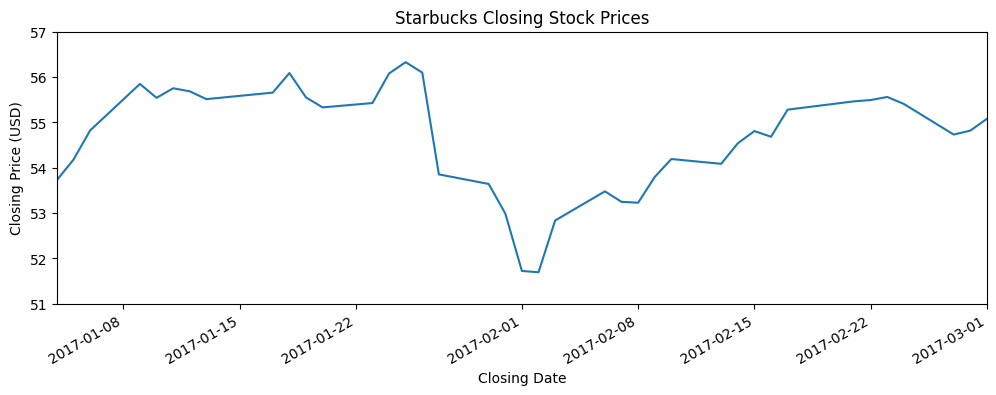

In [33]:
#dates separated by commas
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = starbucks['Close'].plot(xlim=['2017-01-04','2017-03-01'],ylim=[51,57],figsize=(12,4),title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

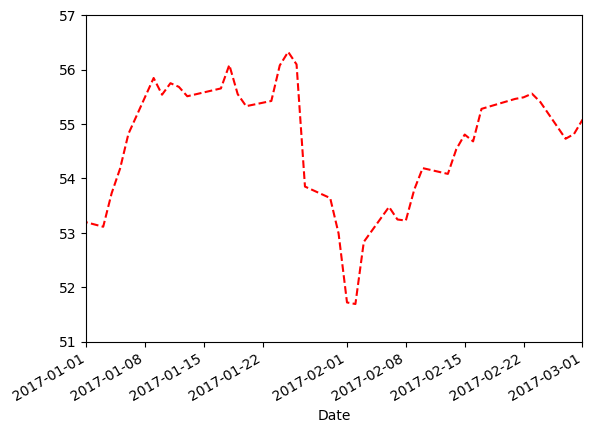

In [34]:
starbucks['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],ls='--',c='r');

In [43]:

from matplotlib import dates

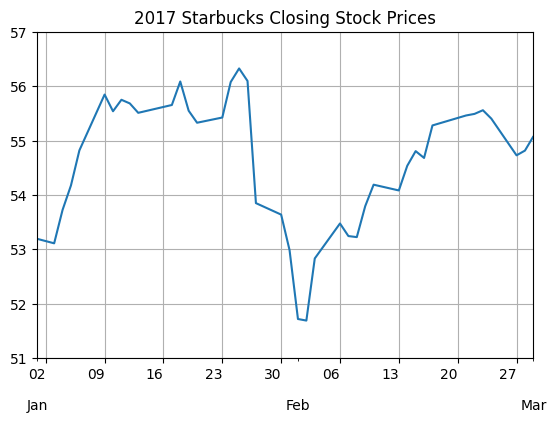

In [44]:

ax = starbucks['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [45]:
df2 = pd.read_csv('/UMTMVS.csv')

In [46]:
df2 = df2.set_index('DATE')

In [48]:
df2.index = pd.to_datetime(df2.index)

<Axes: xlabel='DATE'>

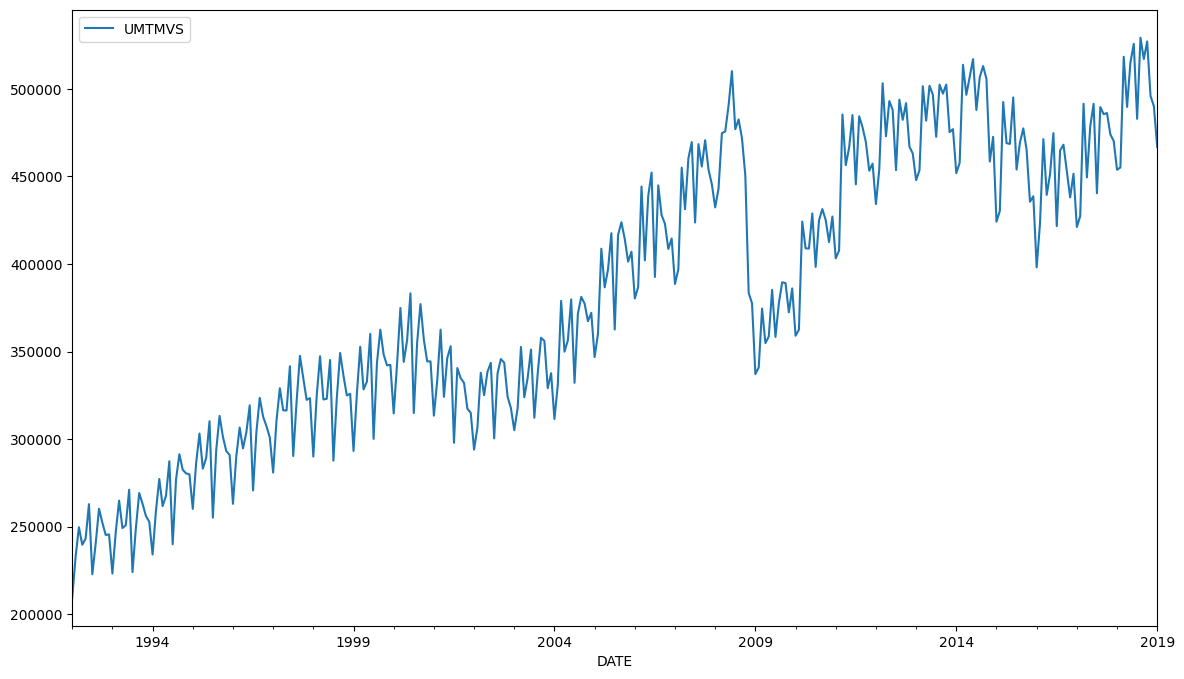

In [49]:
df2.plot(figsize=(14,8))

In [52]:
# to get the percent increase in value from Jan 2009 to Jan 2019
100 * (df2.loc['2019-01-01'] - df2.loc['2009-01-01']) / df2.loc['2009-01-01']

UMTMVS    38.472149
dtype: float64

In [53]:
# six months with highest values
df2.sort_values(by='UMTMVS',ascending=False).head(5)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0


/tmp/ipykernel_2359659/111873898.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df2.resample('Y').mean().plot.bar(figsize=(15,8))


<Axes: xlabel='DATE'>

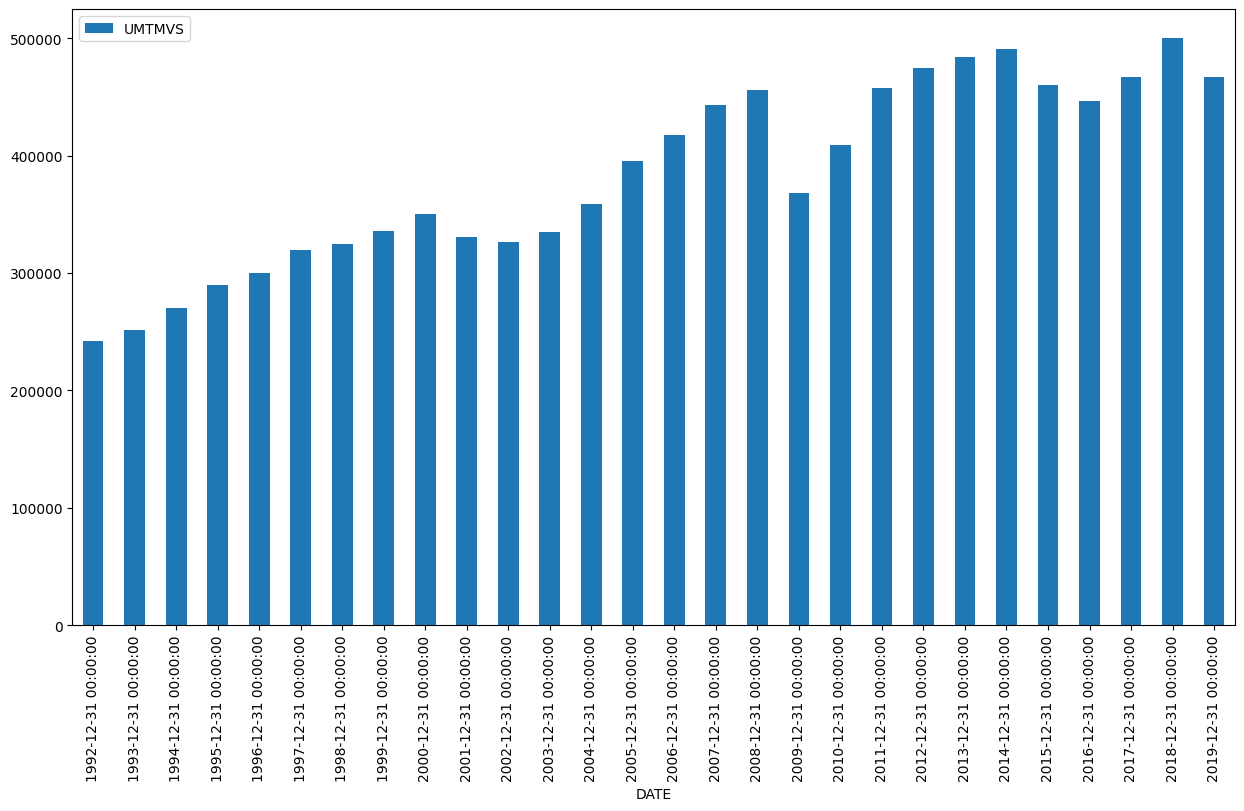

In [54]:
df2.resample('Y').mean().plot.bar(figsize=(15,8))

The year had the biggest increase in mean value from the previous year's mean value

In [57]:
yearly_data = df2.resample('Y').mean()
yearly_data_shift = yearly_data.shift(1)

/tmp/ipykernel_2359659/3045365374.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = df2.resample('Y').mean()


In [58]:
change = yearly_data - yearly_data_shift

In [59]:
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00')

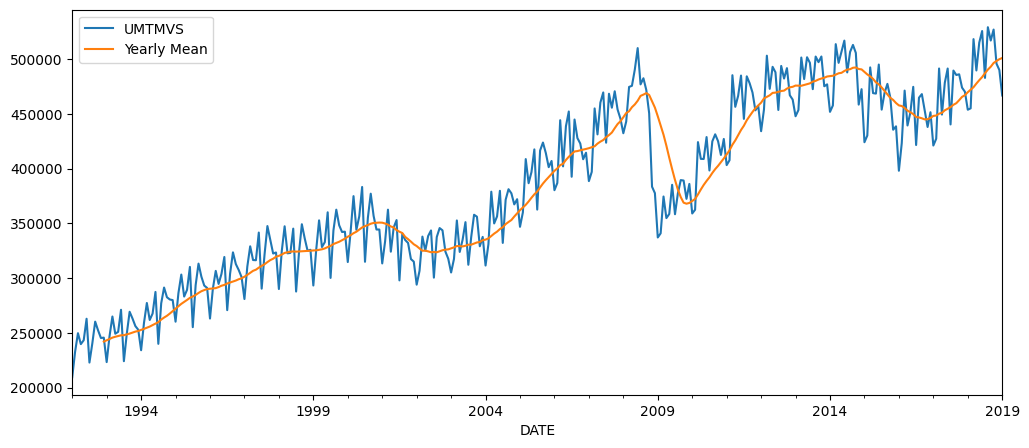

In [60]:
df2['Yearly Mean'] = df2['UMTMVS'].rolling(window=12).mean()
df2[['UMTMVS','Yearly Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

Stats models exploration